### Null Hypothesis Test:

# Is crime related to population? 

**$H_{1}$:p>c**  _where (p) is the Probability of (c) Crime increase_

If crime IS related to population density
> Then the incidence of crime (Mean occurences) between 2012-2015 in the city of Chicago will be higher in areas where the population is higher

**$H_{0}$:p$\leq$c**

If crime IS NOT related to population density
>Then crimes occurences will be equal to or lower

This dataset reflects reported incidents of crime that occurred in the City of Chicago from 2012 to 2015

In [1]:
%matplotlib notebook
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

In [2]:
# Make a reference to the Crimes_-_2001_to_present file path
crime_path = "C:/Users/Maria/Documents/Colorama - Copy/MariaProject1/Images/Crimes_-_2001_to_present.csv"

# Import the csv file as a DataFrame
crime_df = pd.read_csv(crime_path, encoding="utf-8")
crime_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [3]:
#remove the damn spaces!
cols = crime_df.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
crime_df.columns = cols
crime_df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [5]:
communityarea_path = "C:/Users/Maria/Documents/Colorama - Copy/MariaProject1/Images/community_area_to_census.csv"

# Import the csv file as a DataFrame
communityarea_path = pd.read_csv(communityarea_path, encoding="utf-8", index_col=0)

communityarea_path.head()

,Community_Number,Public Use Area
Community,,
Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
West Ridge,2,"Chicago City (North)--West Ridge, Lincoln Squa..."
Uptown,3,"Chicago City (North)--Edgewater, Uptown & Roge..."
Lincoln Square,4,"Chicago City (North)--West Ridge, Lincoln Squa..."
North Center,5,"Chicago City (North)--West Ridge, Lincoln Squa..."


In [6]:
#remove the damn spaces!
cols = communityarea_path.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
communityarea_path.columns = cols
communityarea_path.head()

,Community_Number,Public_Use_Area
Community,,
Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
West Ridge,2,"Chicago City (North)--West Ridge, Lincoln Squa..."
Uptown,3,"Chicago City (North)--Edgewater, Uptown & Roge..."
Lincoln Square,4,"Chicago City (North)--West Ridge, Lincoln Squa..."
North Center,5,"Chicago City (North)--West Ridge, Lincoln Squa..."


In [7]:
year= [2012, 2013, 2014, 2015]

In [8]:
Prim_types_df = pd.DataFrame()

In [9]:
#Calucalate total number types of crimes committed 
#and a description of the crime in the area
#between 2012-2015

# Make a request for each of the years
for x in year:    
    Prim_types_df = pd.concat([Prim_types_df, crime_df[crime_df.Year == x]])
       

#Prim_types = crime_df.groupby("year")["SN"].count()

In [10]:
Prim_types_df.reset_index().drop('index', axis=1)

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10433096,HZ170962,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
1,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
2,11227247,JB147078,01/01/2012 09:00:00 AM,105XX S INDIANAPOLIS AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,10.0,52.0,11,NaN,NaN,2012,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11228588,JB149037,06/04/2012 12:00:00 PM,037XX W 85TH PL,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18.0,70.0,11,NaN,NaN,2012,02/12/2018 03:49:14 PM,NaN,NaN,NaN
4,11243251,JB166394,08/07/2012 12:01:00 AM,037XX W HAYFORD ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,18.0,70.0,02,NaN,NaN,2012,10/15/2018 04:31:50 PM,NaN,NaN,NaN
5,11244255,JB169720,01/01/2012 12:01:00 AM,019XX N LA CROSSE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,31.0,19.0,17,NaN,NaN,2012,03/02/2018 03:54:48 PM,NaN,NaN,NaN
6,11230974,JB152462,08/06/2012 12:01:00 AM,058XX S NORDICA AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,23.0,56.0,02,NaN,NaN,2012,02/16/2018 03:51:14 PM,NaN,NaN,NaN
7,11248976,JB170105,01/01/2012 12:01:00 AM,087XX S ABERDEEN ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,21.0,71.0,20,NaN,NaN,2012,03/07/2018 04:15:21 PM,NaN,NaN,NaN
8,11250480,JB177844,01/01/2012 12:01:00 AM,066XX S MAY ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,17.0,68.0,17,NaN,NaN,2012,03/09/2018 03:55:02 PM,NaN,NaN,NaN
9,11251585,JB179410,01/10/2012 12:00:00 AM,048XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,28.0,25.0,17,NaN,NaN,2012,03/10/2018 03:49:20 PM,NaN,NaN,NaN


In [11]:
Primary_types_df = Prim_types_df.loc[:, ["ID", "Date", "Primary_Type",
                                    "Description", "Community_Area", "Year"]]
Primary_types_df.head()

,ID,Date,Primary_Type,Description,Community_Area,Year
64596,10433096,01/01/2012 12:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,19.0,2012
64618,10433124,01/01/2012 12:00:00 AM,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,19.0,2012
107497,11227247,01/01/2012 09:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,52.0,2012
229769,11228588,06/04/2012 12:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,70.0,2012
638569,11243251,08/07/2012 12:01:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,70.0,2012


### The types of crimes that occurred in each community area

In [12]:
type_summary_df = (Primary_types_df.groupby(["Year", "Community_Area", "Primary_Type"], as_index=False)
                    ["ID"].agg(['mean', 'count'])
                  )
type_summary_df


mean  count
Year Community_Area Primary_Type                                         
2012 0.0            CRIMINAL DAMAGE                   8.487665e+06      1
                    CRIMINAL TRESPASS                 8.514335e+06      1
                    DECEPTIVE PRACTICE                8.777926e+06      2
                    MOTOR VEHICLE THEFT               8.602602e+06      1
                    NARCOTICS                         8.655272e+06      1
     1.0            ARSON                             8.690391e+06      5
                    ASSAULT                           8.680855e+06    340
                    BATTERY                           8.696316e+06    991
                    BURGLARY                          8.690538e+06    212
                    CRIM SEXUAL ASSAULT               8.999773e+06     17
                    CRIMINAL DAMAGE                   8.680762e+06    500
                    CRIMINAL TRESPASS                 8.678304e+06    183
                    DECEPTIVE PRACTICE                8.797604e+06    159
                    GAMBLING                          8.687110e+06      6
                    HOMICIDE                          2.041367e+04      6
                    INTERFERENCE WITH PUBLIC OFFICER  8.721485e+06     33
                    INTIMIDATION                      8.870256e+06      4
                    KIDNAPPING                        8.517757e+06      4
                    LIQUOR LAW VIOLATION              8.690209e+06     21
                    MOTOR VEHICLE THEFT               8.703593e+06    142
                    NARCOTICS                         8.660354e+06    485
                    OBSCENITY                         8.928128e+06      1
                    OFFENSE INVOLVING CHILDREN        8.683095e+06     26
                    OTHER OFFENSE                     8.701500e+06    361
                    PROSTITUTION                      8.660061e+06     30
                    PUBLIC PEACE VIOLATION            8.701630e+06     48
                    ROBBERY                           8.708880e+06    202
                    SEX OFFENSE                       8.677758e+06     24
                    STALKING                          8.578858e+06      3
                    THEFT                             8.711840e+06   1049
...                                                            ...    ...
2015 76.0           OTHER OFFENSE                     1.010282e+07    233
                    PUBLIC PEACE VIOLATION            1.017492e+07     49
                    ROBBERY                           1.023985e+07     17
                    SEX OFFENSE                       1.028181e+07      6
                    STALKING                          1.017083e+07      1
                    THEFT                             1.015752e+07    517
                    WEAPONS VIOLATION                 1.030127e+07      7
     77.0           ARSON                             1.003084e+07      1
                    ASSAULT                           1.016246e+07    148
                    BATTERY                           1.015501e+07    374
                    BURGLARY                          1.016085e+07    109
                    CRIM SEXUAL ASSAULT               1.023762e+07     19
                    CRIMINAL DAMAGE                   1.014693e+07    218
                    CRIMINAL TRESPASS                 1.013289e+07     82
                    DECEPTIVE PRACTICE                1.023222e+07    196
                    GAMBLING                          1.014746e+07      1
                    HOMICIDE                          5.122390e+06      2
                    INTERFERENCE WITH PUBLIC OFFICER  1.005015e+07      2
                    INTIMIDATION                      1.041703e+07      1
                    LIQUOR LAW VIOLATION              1.018797e+07      3
                    MOTOR VEHICLE THEFT               1.020565e+07     95
                    NARCOTICS                         1.008522e+07

In [13]:
type_summary_df = type_summary_df.reset_index()

In [14]:
communityarea_path = communityarea_path.reset_index()


In [15]:
#you will need this code to merge the population data.
# Merge our newly combined dataframe with the 2015 dataframe
#Crime_Summary_df = pd.merge(type_summary_df, communityarea_path, how="inner", on='Community Area')
Crime_Summary_df = pd.merge(type_summary_df, communityarea_path, 
                            left_on='Community_Area', right_on='Community_Number', 
                            how='inner',
                            validate="m:1"
                           )
 

#***I NEED TO INCLUDE THE Community COLUMN FROM THE communityarea_path FILE

In [16]:
Crime_Summary_df.head()

,Year,Community_Area,Primary_Type,mean,count,Community,Community_Number,Public_Use_Area
0,2012,1.0,ARSON,8.690391e+06,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
1,2012,1.0,ASSAULT,8.680855e+06,340,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
2,2012,1.0,BATTERY,8.696316e+06,991,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
3,2012,1.0,BURGLARY,8.690538e+06,212,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."
4,2012,1.0,CRIM SEXUAL ASSAULT,8.999773e+06,17,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."


In [19]:
population_path = "C:/Users/Maria/Documents/Colorama - Copy/MariaProject1/Images/Illinois_Population.csv"

# Import the csv file as a DataFrame
population_path = pd.read_csv(population_path, encoding="utf-8", index_col=0)

population_path.head()

,Name,Total Population,Public Use Microdata Area,Year
0,"Jo Daviess, Carroll, Whiteside & Lee Counties ...",132179,104,2012
1,"Rock Island County PUMA, Illinois",147504,105,2012
2,"Henry, Mercer, Henderson, Warren, Hancock, McD...",180417,202,2012
3,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,300,2012
4,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,401,2012


In [20]:
#remove the damn spaces!
cols = population_path.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
population_path.columns = cols
population_path.head()

,Name,Total_Population,Public_Use_Microdata_Area,Year
0,"Jo Daviess, Carroll, Whiteside & Lee Counties ...",132179,104,2012
1,"Rock Island County PUMA, Illinois",147504,105,2012
2,"Henry, Mercer, Henderson, Warren, Hancock, McD...",180417,202,2012
3,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,300,2012
4,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,401,2012


In [21]:
Population_df = pd.DataFrame(population_path)

In [22]:
Crime_Summary_df.Community.drop_duplicates().values

array(['Rogers Park', 'West Ridge', 'Uptown', 'Lincoln Square',
       'North Center', 'Lake View', 'Lincoln Park', 'Near North Side',
       'Edison Park', 'Norwood Park', 'Jefferson Park', 'Forest Glen',
       'North Park', 'Albany Park', 'Portage Park', 'Irving Park',
       'Dunning', 'Montclare', 'Belmont Cragin', 'Hermosa', 'Avondale',
       'Logan Square', 'Humboldt Park', 'West Town', 'Austin',
       'West Garfield Park', 'East Garfield Park', 'Near West Side',
       'North Lawndale', 'South Lawndale', 'Lower West Side', 'Loop',
       'Near South Side', 'Armour Square', 'Douglas', 'Oakland',
       'Fuller Park', 'Grand Boulevard', 'Kenwood', 'Washington Park',
       'Hyde Park', 'Woodlawn', 'South Shore', 'Chatham', 'Avalon Park',
       'South Chicago', 'Burnside', 'Calumet Heights', 'Roseland',
       'Pullman', 'South Deering', 'East Side', 'West Pullman',
       'Riverdale', 'Hegewisch', 'Garfield Ridge', 'Archer Heights',
       'Brighton Park', 'McKinley Park', 'Br

In [23]:
Names = Population_df['Name'].values
communities = Crime_Summary_df.Community.drop_duplicates().values

community_names = {}
for community in communities:
    for names in Names :
        if community in names :
            community_names[community] = names

In [24]:
community_names

{'Rogers Park': 'Chicago City (North)--Edgewater, Uptown & Rogers Park PUMA; Illinois',
 'West Ridge': 'Chicago City (North)--West Ridge, Lincoln Square & North Center PUMA; Illinois',
 'Uptown': 'Chicago City (North)--Edgewater, Uptown & Rogers Park PUMA; Illinois',
 'Lincoln Square': 'Chicago City (North)--West Ridge, Lincoln Square & North Center PUMA; Illinois',
 'North Center': 'Chicago City (North)--West Ridge, Lincoln Square & North Center PUMA; Illinois',
 'Lake View': 'Chicago City (North)--Lake View & Lincoln Park PUMA, Illinois',
 'Lincoln Park': 'Chicago City (North)--Lake View & Lincoln Park PUMA, Illinois',
 'Near North Side': 'Chicago City (Central)--Near North Side, Loop & Near South Side PUMA; Illinois',
 'Edison Park': 'Cook County (North)--Maine, Norwood Park Townships & Chicago City--Edison Park PUMA; Illinois',
 'Norwood Park': "Cook County (West)--Leyden, Norwood Park (South) Townships & Chicago City--O'Hare PUMA; Illinois",
 'Jefferson Park': 'Chicago City (North

In [25]:
Crime_Summary_df.head(1)

,Year,Community_Area,Primary_Type,mean,count,Community,Community_Number,Public_Use_Area
0,2012,1.0,ARSON,8690390.8,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge..."


In [26]:
Full_crime_pop = (Crime_Summary_df.merge(Population_df, 
                                         left_on = 'Public_Use_Area', 
                                         right_on='Name')
                                  .drop(['Name', 'Year_y', 'Community_Area'], 
                                        axis=1)
                                  .rename({'Year_x' : 'Year',
                                          'Community_Number' : 'Community_id'},
                                          axis=1)
                 )

##### This file is combination of crime data, crime area and population

In [27]:
Full_crime_pop.head()

,Year,Primary_Type,mean,count,Community,Community_id,Public_Use_Area,Total_Population,Public_Use_Microdata_Area
0,2012,ARSON,8.690391e+06,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge...",167887,3501
1,2012,ARSON,8.690391e+06,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge...",167162,3501
2,2012,ARSON,8.690391e+06,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge...",164391,3501
3,2012,ARSON,8.690391e+06,5,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge...",164412,3501
4,2012,ASSAULT,8.680855e+06,340,Rogers Park,1,"Chicago City (North)--Edgewater, Uptown & Roge...",167887,3501


#### Total population from 2012-2015 in each area 

In [28]:
df.groupby('ticker')['adj_close'].plot(legend=True)

NameError: name 'df' is not defined

In [29]:
PrimaryTypes_Summ = (Full_crime_pop.groupby(["Year", "Public_Use_Area"])
                    ["Total_Population"].agg(['sum'])
                                        .rename({'sum': 'Total_pop'}, axis=1)
                    )
PrimaryTypes_Summ = PrimaryTypes_Summ.reset_index()
#PrimaryTypes_Summ = PrimaryTypes_Summ.set_index('Year')
PrimaryTypes_Summ

,Year,Public_Use_Area,Total_pop
0,2012,"Chicago City (Central)--Near North Side, Loop ...",40927292
1,2012,"Chicago City (North)--Edgewater, Uptown & Roge...",49125048
2,2012,Chicago City (North)--Lake View & Lincoln Park...,35897950
3,2012,"Chicago City (North)--West Ridge, Lincoln Squa...",42867571
4,2012,"Chicago City (Northwest)--Irving Park, Albany ...",54087904
5,2012,"Chicago City (Northwest)--Logan Square, Avonda...",40706187
6,2012,"Chicago City (Northwest)--Portage Park, Dunnin...",35865502
7,2012,"Chicago City (South)--Ashburn, Washington Heig...",47534490
8,2012,"Chicago City (South)--Auburn Gresham, Roseland...",65165590
9,2012,"Chicago City (South)--Chicago Lawn, Englewood/...",60607878


#### Total number of each type of crime committed in each area from 2012-2015

In [33]:
primeType_count = (Full_crime_pop.groupby(["Year","Primary_Type"])
                    ["count"].agg(['sum'])
                            .rename({'sum': 'Tot_count'}, axis=1)
                            .sort_values('Tot_count', ascending=False)
                  )

primeType_count = primeType_count.reset_index()
primeType_count.head()

,Year,Primary_Type,Tot_count
0,2012,THEFT,277836
1,2013,THEFT,263888
2,2014,THEFT,226540
3,2015,THEFT,213172
4,2012,BATTERY,209192


### Total population from 2012-2015 in each area
### Total number of each type of crime committed in each area from 2012-2015

### Types of crime committed the most in each area from 2012-2015

In [36]:
committed_crimes = (primeType_count.groupby(['Primary_Type'], as_index=False)
                    ['Tot_count'].agg(['sum'])
                                .rename({'sum': 'sum_crimes'}, axis=1)
                                .sort_values('sum_crimes', ascending=False)
                   )
  
committed_crimes = committed_crimes.reset_index()
Top_Crimes = committed_crimes.head()
Top_Crimes = Top_Crimes.reset_index()
Top_Crimes.columns

Index(['index', 'Primary_Type', 'sum_crimes'], dtype='object')

<IPython.core.display.Javascript object>


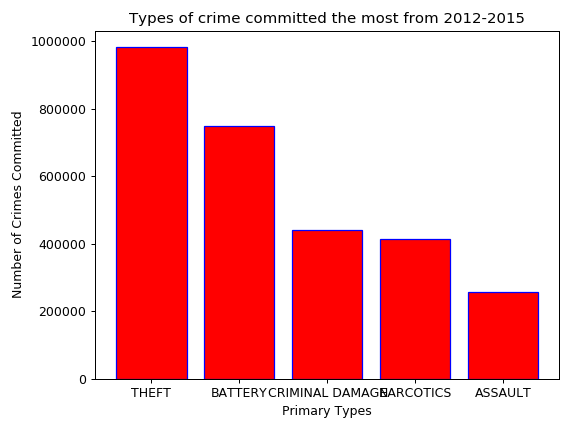

In [38]:
#y_axis_Top_Crimes = Top_Crimes[Top_Crimes['Primary_Type']].count()
PrimTypesX_axis = Top_Crimes['Primary_Type']
PrimTypesY_axis = Top_Crimes['sum_crimes']

plt.bar(PrimTypesX_axis, PrimTypesY_axis, color='r', edgecolor='b', alpha=1.0, align="center")

# Give our chart some labels and a tile
plt.title("Types of crime committed the most from 2012-2015")
plt.xlabel("Primary Types")
plt.ylabel("Number of Crimes Committed")

# Save an image of the chart and print it to the screen
#plt.savefig("../Images/TotalCrimes.png")
plt.tight_layout()
plt.show()

In [ ]:
primeType_count.columns